In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv("datasets/retail.csv")

In [3]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [19]:
dic={}
for feature in df.columns:
    if df[feature].dtype =="O":
        dic[feature]=list(df[feature].unique())
    

In [22]:
del dic["Sub-Category"]

In [25]:
del dic["State"]

In [26]:
dic

{'Ship Mode': ['Second Class', 'Standard Class', 'First Class', 'Same Day'],
 'Segment': ['Consumer', 'Corporate', 'Home Office'],
 'Country': ['United States'],
 'Region': ['South', 'West', 'Central', 'East'],
 'Category': ['Furniture', 'Office Supplies', 'Technology']}

In [28]:
df.Profit=np.abs(df.Profit)

In [29]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


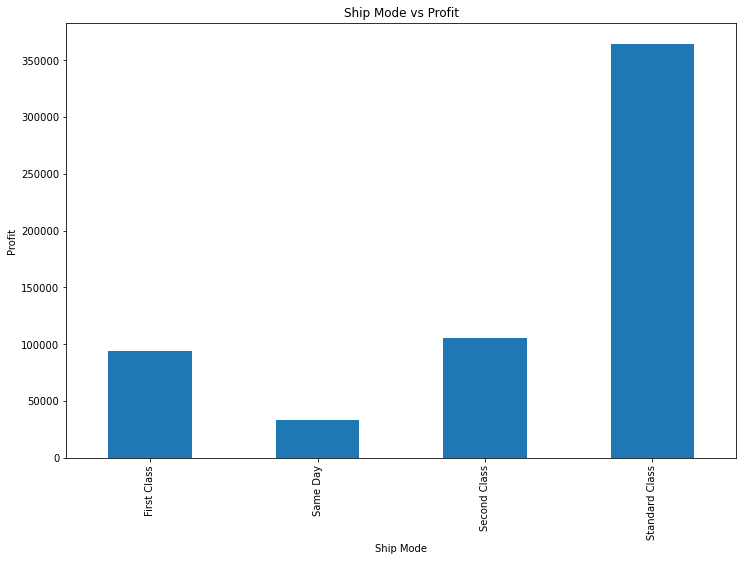

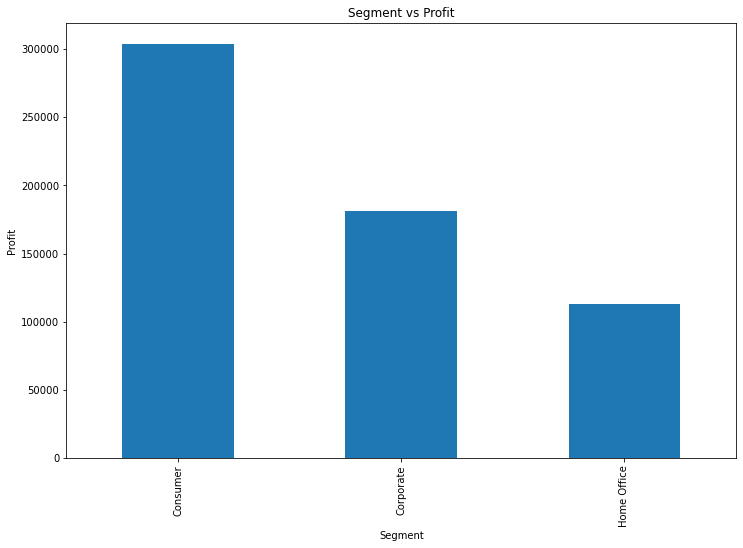

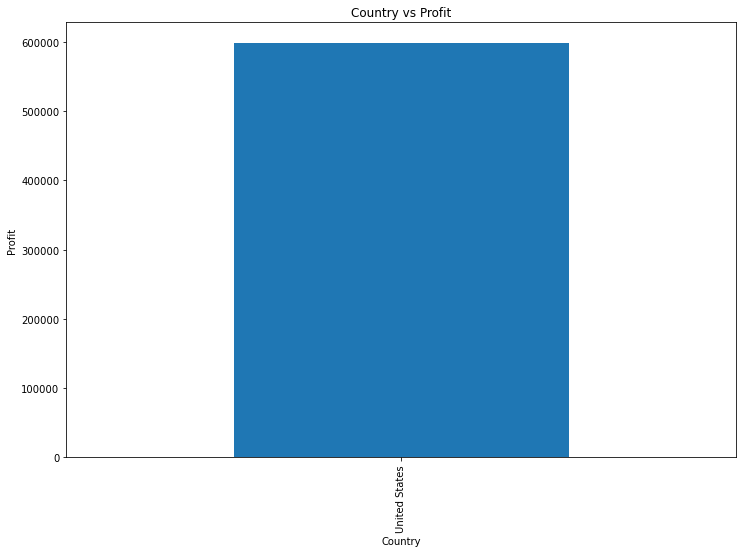

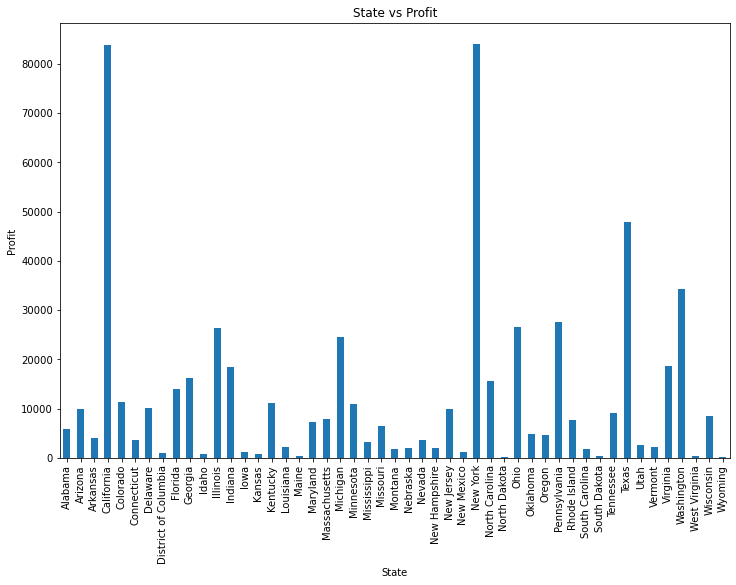

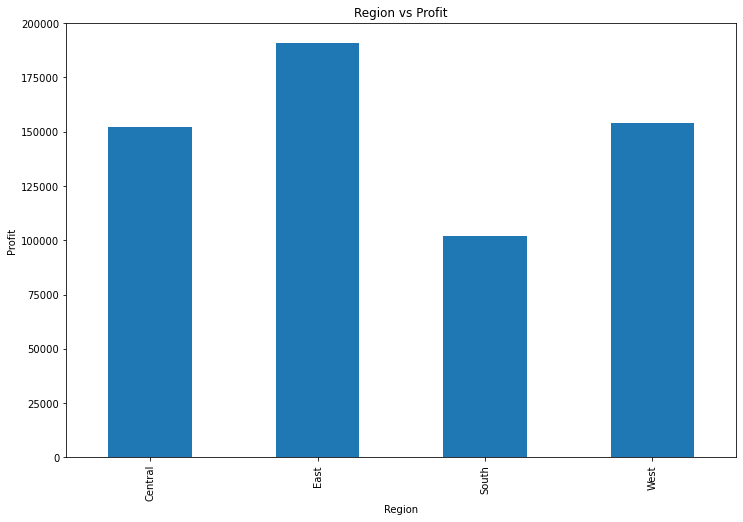

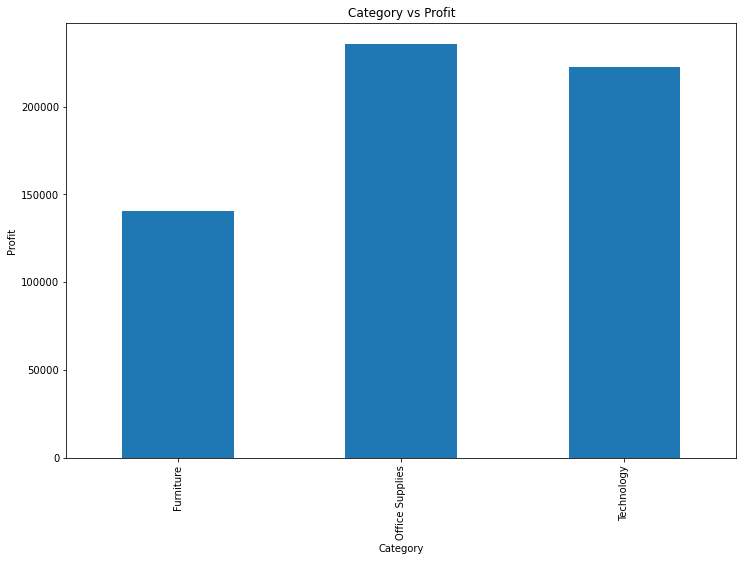

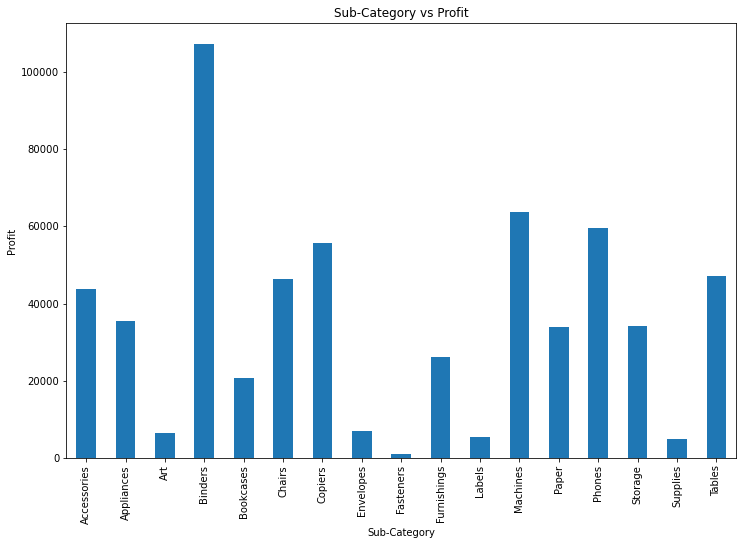

In [33]:
### For categorical feature 
for feature in df.columns:
    if df[feature].dtype=="O" and feature!="City":
        df.groupby(feature)["Profit"].sum().plot(kind="bar",xlabel=feature,ylabel="Profit",figsize=(12,8))
        plt.title(feature+ " vs Profit")
        plt.show()

In [36]:
len(df["Postal Code"].unique())

631

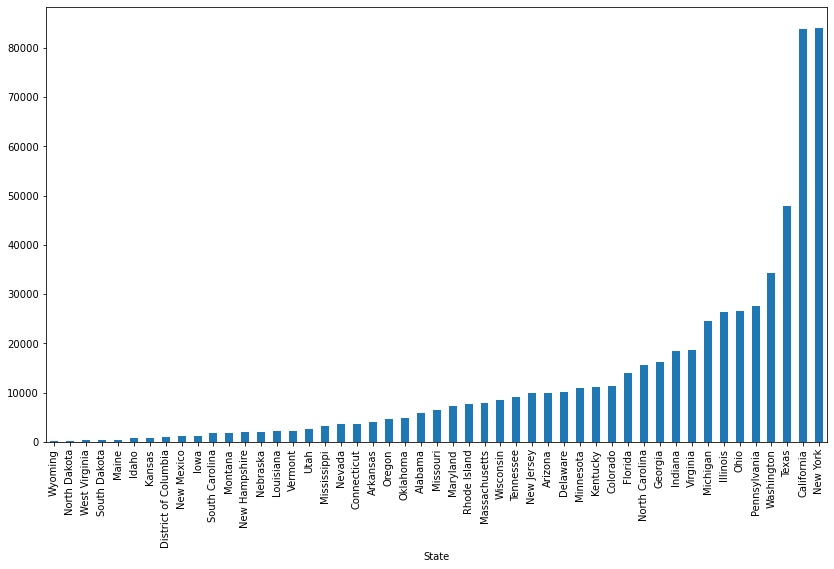

In [61]:
df.groupby("State")["City"].count().sort_values().plot(kind="bar",figsize=(14,10))

df.groupby("State")["Profit"].sum().sort_values().plot(kind="bar",figsize=(14,8))
plt.show()

In [100]:
profit=df.groupby("State")["Profit"].sum()
city=df.groupby("State")["City"].count()
index=profit.index

In [105]:
cityprofit=pd.concat([profit,city],axis=1)
cityprofit

,Profit,City
State,,
Alabama,5786.8253,61
Arizona,9885.6104,224
Arkansas,4008.6871,60
California,83920.7173,2001
Colorado,11273.9517,182
Connecticut,3550.7210,82
Delaware,10149.1674,96
District of Columbia,1059.5893,10
Florida,13980.3573,383


In [107]:
import seaborn as sns

In [108]:
sns.barplot(x=index,y=[cityprofit["City"],cityprofit["Profit"]])

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [65]:
city=df.groupby("State")["City"].count().sort_values()

profit=df.groupby("State")["Profit"].sum().sort_values()


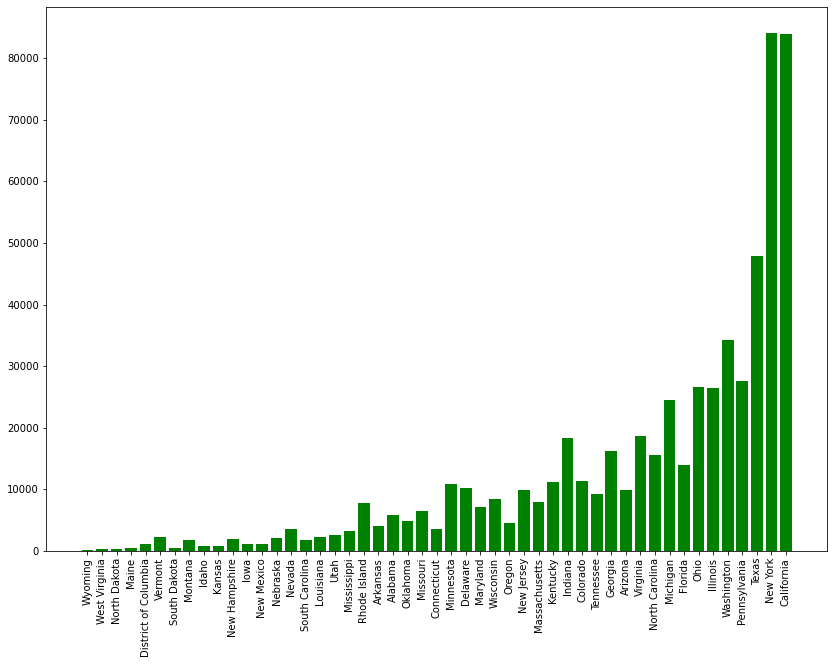

In [86]:
plt.figure(figsize=(14,10))
plt.bar(city.index,city.values)
plt.bar(profit.index,profit.values,color="green")
plt.xticks(rotation=90)
plt.show()

In [75]:
city.index

Index(['Wyoming', 'West Virginia', 'North Dakota', 'Maine',
       'District of Columbia', 'Vermont', 'South Dakota', 'Montana', 'Idaho',
       'Kansas', 'New Hampshire', 'Iowa', 'New Mexico', 'Nebraska', 'Nevada',
       'South Carolina', 'Louisiana', 'Utah', 'Mississippi', 'Rhode Island',
       'Arkansas', 'Alabama', 'Oklahoma', 'Missouri', 'Connecticut',
       'Minnesota', 'Delaware', 'Maryland', 'Wisconsin', 'Oregon',
       'New Jersey', 'Massachusetts', 'Kentucky', 'Indiana', 'Colorado',
       'Tennessee', 'Georgia', 'Arizona', 'Virginia', 'North Carolina',
       'Michigan', 'Florida', 'Ohio', 'Illinois', 'Washington', 'Pennsylvania',
       'Texas', 'New York', 'California'],
      dtype='object', name='State')